In [17]:
# 이미지 예측 테스트
import os

# 이미지 경로 가져오기
IMG_DIR = '../data/image/hello/'

IMG_LIST = os.listdir(IMG_DIR)
print(f'IMG_LIST => {IMG_LIST}')

IMG_LIST = [IMG_DIR + filename for filename in IMG_LIST if filename.endswith('.jfif')]
print(f'IMG_LIST => {IMG_LIST}')

IMG_LIST => ['new1.png', 'new2.png', 'w1.jfif', 'w2.jfif', 'w3.jfif', 'w4.jfif']
IMG_LIST => ['../data/image/hello/w1.jfif', '../data/image/hello/w2.jfif', '../data/image/hello/w3.jfif', '../data/image/hello/w4.jfif']


원본 이미지 정보: <PIL.Image.Image image mode=RGB size=340x446 at 0x1D43DE09520>
전처리 이후 shape: torch.Size([3, 224, 224])
배치 추가 후 shape: torch.Size([1, 3, 224, 224])


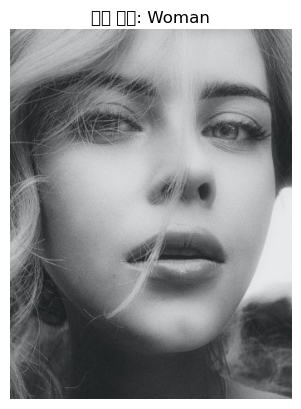

원본 이미지 정보: <PIL.Image.Image image mode=RGB size=340x340 at 0x1D41E42C970>
전처리 이후 shape: torch.Size([3, 224, 224])
배치 추가 후 shape: torch.Size([1, 3, 224, 224])


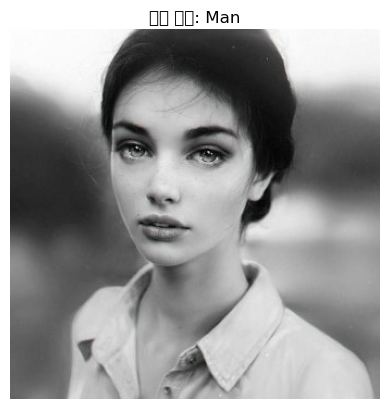

원본 이미지 정보: <PIL.Image.Image image mode=RGB size=340x511 at 0x1D41DE49E20>
전처리 이후 shape: torch.Size([3, 224, 224])
배치 추가 후 shape: torch.Size([1, 3, 224, 224])


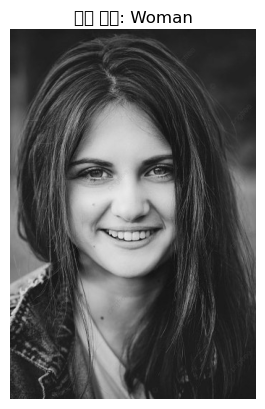

원본 이미지 정보: <PIL.Image.Image image mode=RGB size=340x255 at 0x1D43F0099A0>
전처리 이후 shape: torch.Size([3, 224, 224])
배치 추가 후 shape: torch.Size([1, 3, 224, 224])


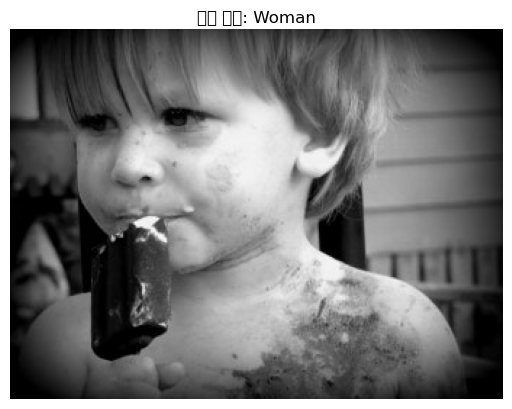

In [18]:
# 이미지 로딩 후 전처리
from PIL import Image
from torchvision.models import AlexNet_Weights
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

from torchvision.models import alexnet

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 모델 정의
model = alexnet(weights=None)
model.classifier[6] = torch.nn.Linear(4096, 2)  # 'Man', 'Woman' → 클래스 수 2개로 수정

# 저장된 가중치 로드
model.load_state_dict(torch.load('./models/alexnet.pt', map_location=device))
model.to(device)
model.eval()  # 평가 모드로 전환

# AlexNet 사전 학습 weight에 맞는 전처리 사용
preprocessing = AlexNet_Weights.DEFAULT.transforms()

class_to_idx = {'Man': 0, 'Woman': 1}
idx_to_class = {v: k for k, v in class_to_idx.items()}



# 모델을 평가 모드로 전환
model.eval()

for imgfile in IMG_LIST:
    # 이미지 열기
    img = Image.open(imgfile).convert("RGB")
    print(f"원본 이미지 정보: {img}")

    # 전처리
    trans_img = preprocessing(img)
    print(f"전처리 이후 shape: {trans_img.shape}")

    # 배치 차원 추가
    trans_img = trans_img.unsqueeze(0).to(device)
    print(f"배치 추가 후 shape: {trans_img.shape}")

    # 예측
    with torch.no_grad():
        outputs = model(trans_img)
        predicted_class = outputs.argmax(dim=1).item()

    # 결과 시각화
    plt.imshow(img)
    plt.title(f"예측 결과: {idx_to_class.get(predicted_class, '알 수 없음')}")
    plt.axis('off')
    plt.show()